# K Means Clustering

K-means clustering is a method used for clustering analysis, especially in data mining and statistics. It aims to partition a set of observations into a number of clusters (k), resulting in the partitioning of the data into Voronoi cells. It can be considered a method of finding out which group a certain object really belongs to.
It is used mainly in statistics and can be applied to almost any branch of study. For example, in marketing, it can be used to group different demographics of people into simple groups that make it easier for marketers to target. Astronomers use it to sift through huge amounts of astronomical data; since they cannot analyze each object one by one, they need a way to statistically find points of interest for observation and investigation.

The algorithm:

    1) K points are placed into the object data space representing the initial group of centroids.
    2) Each object or data point is assigned into the closest k.
    3) After all objects are assigned, the positions of the k centroids are recalculated.
    4) Steps 2 and 3 are repeated until the positions of the centroids no longer move.
 

Advantages:

 -   Easy to implement
 -   With a large number of variables, K-Means may be computationally faster than hierarchical clustering
 -   k-Means may produce tighter clusters than hierarchical clustering
 -   An instance can change cluster (move to another cluster) when the centroids are recomputed.
 
Disavantages:

 -   Difficult to predict the number of clusters (K-Value)
 -   Initial seeds have a strong impact on the final results
 -   The order of the data has an impact on the final results
 -   Sensitive to scale: rescaling datasets (normalization or standardization) will completely change results. 

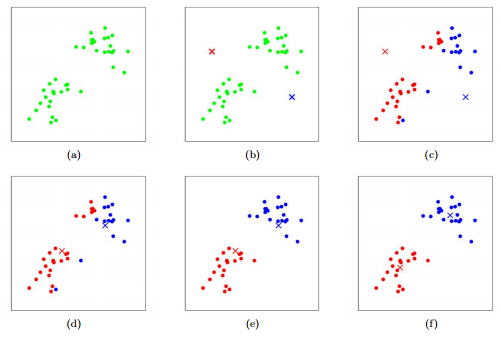

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [4]:
df = pd.read_csv('weatherHistory.csv', header = 0)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# We focuse on continuous feature to do the clustering

In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [16]:
feature_used =['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

data_used = df[feature_used]
data_used.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


(array([    0.,     0.,     0.,     0.,     0., 96453.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

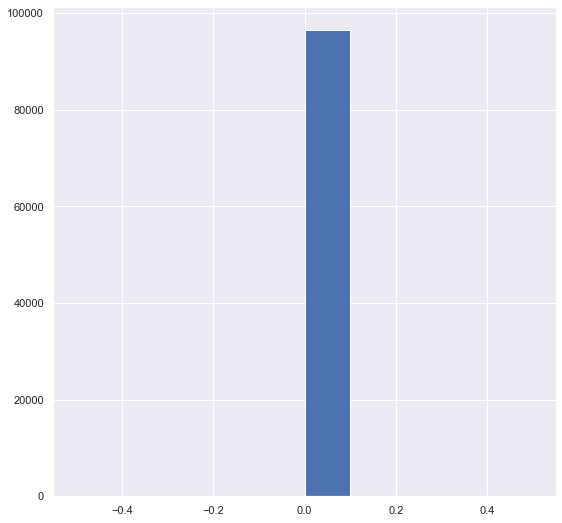

In [21]:
plt.hist(data_used['Loud Cover'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B490DF17F0>,
      dtype=object)

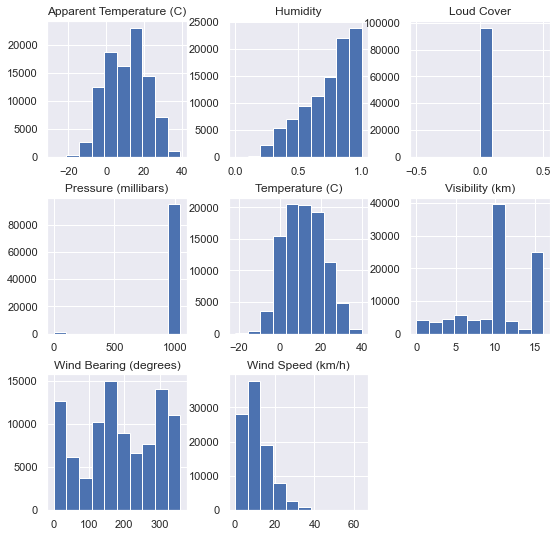

In [20]:
rcParams['figure.figsize'] = 9, 9
data_used[feature_used].hist()

Loud cover seems like a constant, so we won't take it into consideration of the clustering variable.


In [23]:
#delete loud cover
data_new=data_used.drop(['Loud Cover'],axis=1) #drop V0 since we only need V12
data_new.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


## standardized data 

In [25]:
data_std = StandardScaler().fit_transform(data_new)
data_std

array([[-0.25759902, -0.32403547,  0.79347043, ...,  0.591256  ,
         1.30697578,  0.10168518],
       [-0.26981351, -0.3390971 ,  0.63999555, ...,  0.66575578,
         1.30697578,  0.1059598 ],
       [-0.26748694, -0.13810226,  0.79347043, ...,  0.15356981,
         1.09958576,  0.10861007],
       ...,
       [ 1.0580761 ,  1.04553403, -0.89475327, ..., -1.46680034,
         1.37226523,  0.10621628],
       [ 1.00398335,  0.99723295, -0.6901201 , ..., -1.55992506,
         1.37226523,  0.10869557],
       [ 0.89056308,  0.89595648, -0.6389618 , ..., -1.38298809,
         1.23400522,  0.11049091]])

### K-means model

In [31]:
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(data_std)
model.cluster_centers_

array([[-0.91224326, -0.93492409,  0.3361746 , -0.10264278,  0.65638321,
         0.44576505,  0.133774  ],
       [ 1.13071781,  1.11093433, -1.26840687, -0.12799715, -0.88748477,
         0.4086048 ,  0.11100154],
       [-0.85140531, -0.79884556,  0.94212915, -0.45290432,  0.88038729,
        -1.42583591,  0.13544529],
       [ 1.40485923,  1.34708567, -1.56926491,  0.30577457,  0.75596877,
         0.2669465 ,  0.09991372],
       [-0.12844957, -0.1609564 , -0.02478424,  0.28142764,  0.05588285,
        -0.60918431, -8.57691686],
       [-0.75059849, -0.85212138,  0.12325244,  0.67462014, -0.86523482,
         0.24641105,  0.12338036],
       [-1.09223736, -1.05791466,  0.95355894, -0.42595001, -0.75636341,
        -1.49958931,  0.15146056],
       [ 0.30117579,  0.36357802,  0.32594496, -0.56947513, -0.85686254,
         0.47556979,  0.10722685],
       [ 0.38998361,  0.44680364,  0.32252722, -0.38727283,  0.96977043,
         0.55888296,  0.10180894],
       [-0.09320152, -0.1622

In [35]:
n_obs = np.shape(data_std)[0]
n_obs

96453

### choose the optimal k by mean squred error

clustering with 2 centers
clustering with 3 centers
clustering with 4 centers
clustering with 5 centers
clustering with 6 centers
clustering with 7 centers
clustering with 8 centers
clustering with 9 centers


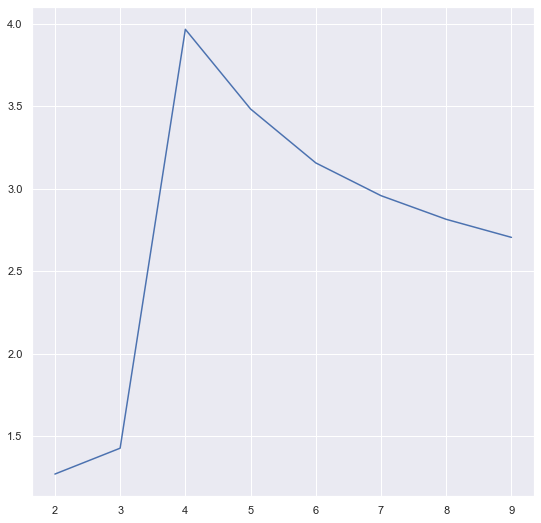

In [58]:
from sklearn.metrics import mean_squared_error

    

ks=[i for i in range(2,10)]
msess=[]

for k in ks:
    print( 'clustering with',k,'centers')
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data_std)
    centers= model.cluster_centers_
    mses=[]
    for c in centers:
        #c_mat = np.repeat(c, n_obs, axis=0)
        mse= (np.square(data_std - c)).mean()
        mses.append(mse)
    msess.append(sum(mses)/len(centers))
        

plt.plot(ks,msess)

k=2 has the lowest mean squred error. So I will choose k=2

In [60]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(data_std)
model.cluster_centers_

array([[ 0.78653912,  0.79520182, -0.60385049,  0.01598706,  0.02968645,
         0.48797534,  0.02216413],
       [-0.79855224, -0.80734725,  0.61307333, -0.01623123, -0.03013986,
        -0.49542838, -0.02250265]])

## Visualization

To visualize the clustering, I will use PCA to reduce the dimension since the previous dataset has 7 features.

In [61]:
# only keep 2 features for visualization
pca = PCA(n_components=2).fit_transform(data_std.copy())
# chech result shape
pca.shape

(96453, 2)

In [63]:
labels = kmeans.fit_predict(pca)

In [66]:
pca_res = pd.DataFrame(pca)
pca_res["Cluster"] = labels
pca_res.insert(0, "Days", df["Formatted Date"])
pca_res.head()

,Days,0,1,Cluster
0,2006-04-01 00:00:00.000 +0200,0.193205,0.781919,0
1,2006-04-01 01:00:00.000 +0200,0.131097,0.861931,0
2,2006-04-01 02:00:00.000 +0200,0.282776,-0.637340,0
3,2006-04-01 03:00:00.000 +0200,0.186826,0.949487,0
4,2006-04-01 04:00:00.000 +0200,0.138043,0.536315,0


## Plot

The visualization verifies our anticipation of the number of clustering of the weather. This makes sense since in the original dataset we knwo that there are two types of the data, which implies that different weather type will have different structures of the features.

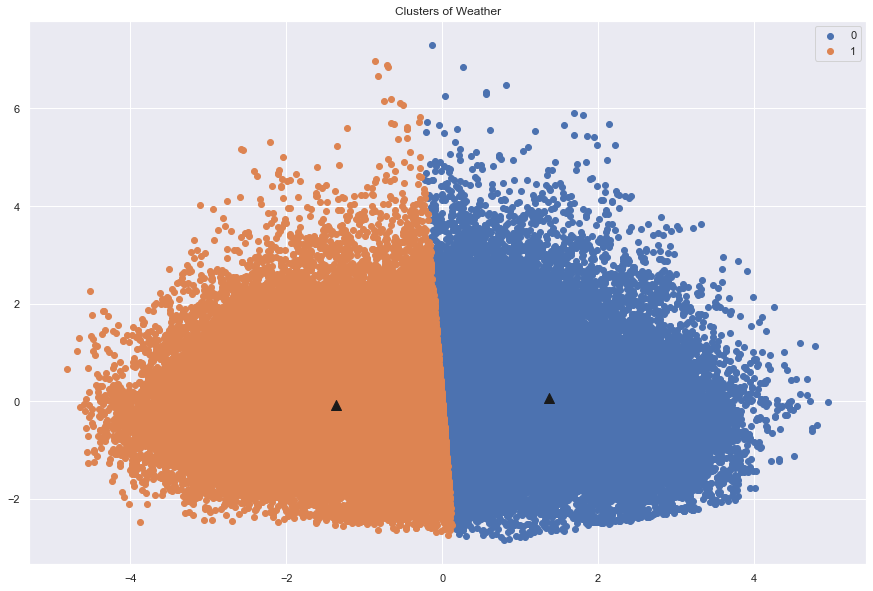

In [68]:
# get the centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

# plot the results:
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (pca_res["Cluster"] == i)
    plt.scatter(pca_res.loc[mask][0], pca_res.loc[mask][1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', marker="^")
plt.title('Clusters of Weather')
plt.legend()
plt.show()